In [17]:
import pandas as pd
import numpy as np
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'D:\Ass\AI_Lab\AI_Proj_Phase2\ADF_Encode.csv')
df = df.drop('Filename',axis=1)
df

,Pitch,Formant1,Formant2,Formant3,Intensity,Duration,Spectral Centroid,age,gender,accent
0,1266.03450,251.054775,840.543750,1905.137294,0.006549,5.832,2147.605880,20,0.0,1.0
1,1629.07790,0.000000,0.000000,520.699438,0.013888,1.728,2815.325442,70,1.0,1.0
2,1681.26670,0.000000,676.308535,1480.648180,0.035668,4.224,1844.637736,30,0.0,1.0
3,954.41925,231.033686,460.115363,1606.665429,0.031007,5.376,2123.711333,60,1.0,3.0
4,1005.09410,252.753530,858.042035,1663.751843,0.043531,3.720,2360.672044,50,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
5610,1284.48500,276.863670,832.535029,1724.024575,0.013427,7.464,3138.407455,40,1.0,1.0
5611,1621.85130,0.000000,473.155354,1456.991673,0.022652,6.696,3812.367533,30,0.0,4.0
5612,1669.43400,380.328398,1040.112372,1790.230782,0.072386,3.024,2469.731797,30,1.0,1.0
5613,1182.86620,0.000000,487.460137,1666.970758,0.069570,4.704,3715.842500,40,1.0,10.0


In [5]:
df.isnull().sum()

Pitch                  0
Formant1               0
Formant2               0
Formant3               0
Intensity              0
Duration               0
Spectral Centroid      0
age                    0
gender                84
accent               766
dtype: int64

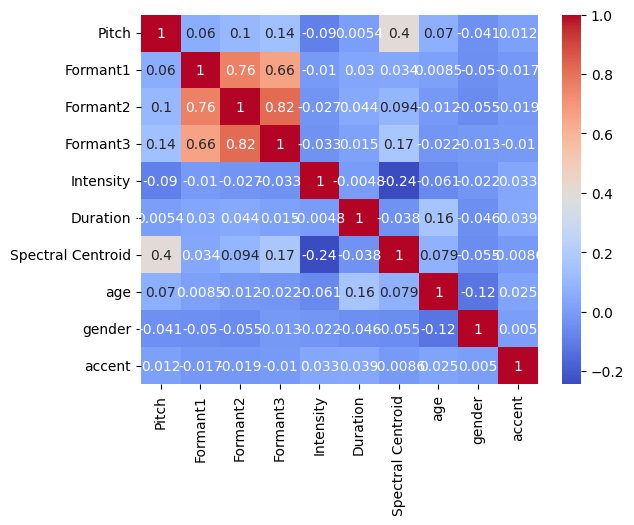

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [135]:

TotalSamples = df[df['gender'].notna()]
TotalSamples = TotalSamples[TotalSamples['accent'].notna()]

# --------------------------Train Data --------------------------
TotalTrain = int(len(TotalSamples) * 0.6)
TotalTrain
TrainSamples = TotalSamples[:TotalTrain]
TrainSamplesX = TrainSamples[ ['Pitch', 'Formant1', 'Formant2', 'Formant3', 'Intensity', 'Duration', 'Spectral Centroid', "gender", 'accent']]
TrainSamplesY = TrainSamples['age']

# --------------------------Test Data --------------------------
Test = TotalSamples[TotalTrain:]
TestX = Test[ ['Pitch', 'Formant1', 'Formant2', 'Formant3', 'Intensity', 'Duration', 'Spectral Centroid', "gender", 'accent']]
TestY = Test['age']




In [8]:

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        

In [9]:
class DecisionTree:
    def __init__(self):
        pass
    
    def train(self, dataX, AgeGroup):
        
        informationGain(dataX, AgeGroup)
        
        
        
        
    

In [139]:
def entropy(dataX, AgeGroup, attribute):

    Total = len(dataX)

    age_counts = Counter([sample for sample in AgeGroup])
    AllGroups = age_counts.keys()
    AllGroups = list(AllGroups)
    AllGroups.sort()
    
    Ages = {}


    # -----------------Calculate Probabilities--------------------
    for index, Value in enumerate(dataX[attribute]):
        Value = int(Value)
        
        if Value not in Ages:
            Ages[Value] = {}
        if AgeGroup[index] not in Ages[Value]:
            Ages[Value][AgeGroup[index]] = 0
            
        Ages[Value][AgeGroup[index]] += 1


    # -----------------Calculate Entropy--------------------
    entropy = 0.0
    for pitch, age_distribution in Ages.items():
        AttributeEffects = sum(age_distribution.values())

        EachEntropy = 0.0
        for age_group, EachGroup in age_distribution.items():
            probability = EachGroup / AttributeEffects
            EachEntropy -= probability * np.log2(probability)
            
        entropy += (AttributeEffects / Total) * EachEntropy     # Weight by the proportion of this pitch

    # print(f"Entropy of the {attribute}: {entropy}")
    return entropy

In [158]:
# def informationGain(dataX, AgeGroup):
    
dataX = TrainSamplesX


AgeGroup = TrainSamplesY
AgeGroup

AgeGroup.reset_index(drop=True, inplace=True)

age_counts = Counter([sample for sample in AgeGroup])
# print(age_counts)

total_samples = len(AgeGroup)
WholeEntropy = 0.0
for count in age_counts.values():
    # print(count, total_samples)
    probability = count / total_samples
    WholeEntropy -= probability * np.log2(probability)    
print('Total Entropy', WholeEntropy)
print()

for attribute in dataX.columns:
    print(attribute, end= ' ')
    E = entropy(dataX, AgeGroup, attribute)
    
    print(WholeEntropy - E)

# AgeGroup

Total Entropy 2.55032921091968

Pitch 1.2806790786339683
Formant1 0.4561942163635404
Formant2 1.1164359719325778
Formant3 1.5597345815327464
Intensity 0.0
Duration 0.05786910107555565
Spectral Centroid 1.9230237843721583
gender 0.0229191955392003
accent 0.13390299368921577


In [153]:
E = entropy(dataX, AgeGroup, 'Formant1')
print(E)
# print(dataX)

2.0941349945561396
